In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*- 
#
# @Author: Mingyeong Yang (mmingyeong@kasi.re.kr)
# @Date: 2025-07-08
# @Filename: 250708_KIAS_BAO_HW.py

In [2]:
import numpy as np
from scipy.integrate import quad, cumtrapz
import matplotlib.pyplot as plt

# Constants
H0 = 70.0  # Hubble constant [km/s/Mpc]
c = 299792.458  # speed of light [km/s]
Omega_m = 0.3
Omega_X = 1.0 - Omega_m

# Equation of state
def w_z(z, w0, w1):
    return w0 + w1 * z

# Exponential term in H(z)
def exp_term(z, w0, w1):
    integrand = lambda zp: (1 + w_z(zp, w0, w1)) / (1 + zp)
    integral = np.array([quad(integrand, 0, zi)[0] for zi in z])
    return np.exp(3 * integral)

# H(z)
def H_z(z, w0, w1, Omega_X):
    Ez2 = Omega_m * (1 + z) ** 3 + Omega_X * exp_term(z, w0, w1)
    return H0 * np.sqrt(Ez2)

# D_A(z)
def D_A(z, Hvals):
    integrand = 1.0 / Hvals
    integral = cumtrapz(integrand, z, initial=0)
    return c / (1 + z) * integral

# Log-derivative
def log_derivative(func, param_name, z, params, dparam=1e-2):
    p_up = params.copy()
    p_down = params.copy()
    p_up[param_name] += dparam
    p_down[param_name] -= dparam

    f_up = func(z, **p_up)
    f_down = func(z, **p_down)
    return (np.log(f_up) - np.log(f_down)) / (2 * dparam)

# z range
z = np.logspace(-1, 1, 300)

# Baseline parameter sets
base_params_1 = {'w0': -1.0, 'w1': 0.0, 'Omega_X': Omega_X}
base_params_2 = {'w0': -1.0, 'w1': 0.5, 'Omega_X': Omega_X}

# Evaluate base H(z) and D_A(z)
def H_wrapper(z, w0, w1, Omega_X): return H_z(z, w0, w1, Omega_X)
def D_A_wrapper(z, w0, w1, Omega_X): return D_A(z, H_z(z, w0, w1, Omega_X))

# Compute derivatives


# 결과는 각 log-derivative 배열입니다. 필요한 경우 .npy 등으로 저장하세요.


NameError: name 'z_mask' is not defined

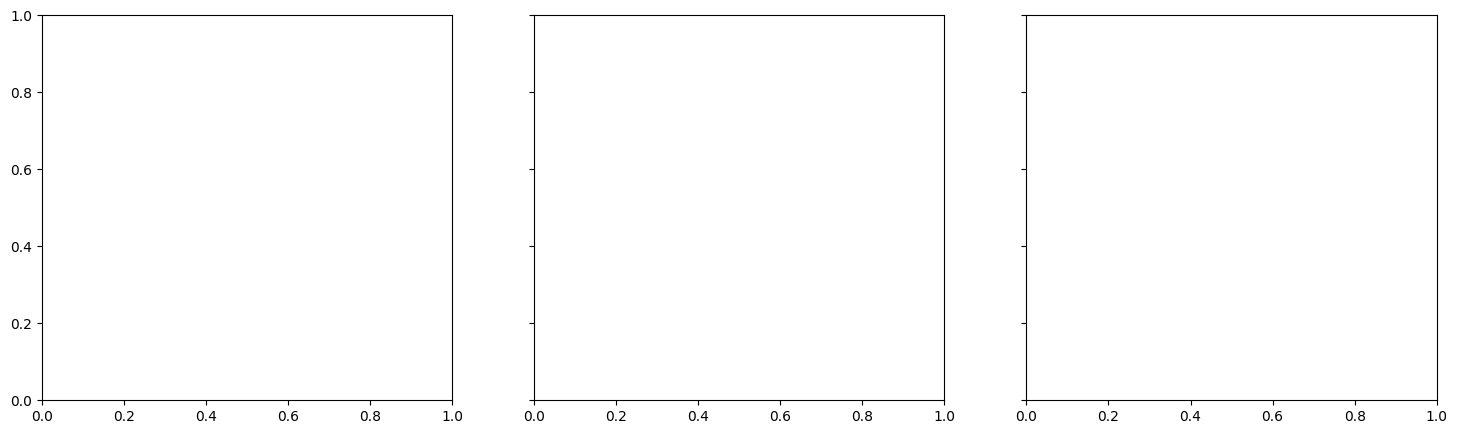

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# 1. w₀
ax = axes[0]
ax.plot(z[z_mask], dlnH_dw0[z_mask], 'k--', label=r'dln H / dw$_0$')
ax.plot(z[z_mask], dlnDA_dw0[z_mask], 'k-.', label=r'dln $D_A$ / dw$_0$')
ax.set_xscale('log')
ax.set_ylim(ymin, ymax)
ax.set_xlabel("Redshift")
ax.set_ylabel("Derivatives")
ax.set_title(r"$w_0$ Derivatives" "\n" r"(fiducial: $w_0 = -1.0$, ΛCDM)")
ax.grid(True)
ax.legend(fontsize=10)

# 2. w₁
ax = axes[1]
ax.plot(z[z_mask], dlnH_dw1[z_mask], 'k-', label=r'dln H / dw$_1$')
ax.plot(z[z_mask], dlnDA_dw1[z_mask], 'k--', label=r'dln $D_A$ / dw$_1$')
ax.set_xscale('log')
ax.set_ylim(ymin, ymax)
ax.set_xlabel("Redshift")
ax.set_title(r"$w_1$ Derivatives" "\n" r"(fiducial: $w_1 = 0.0$, ΛCDM)")
ax.grid(True)
ax.legend(fontsize=10)

# 3. Ωₓ
ax = axes[2]
ax.plot(z[z_mask], dlnH_dOmX[z_mask], 'k:', label=r'dln H / d$\Omega_X$')
ax.plot(z[z_mask], dlnDA_dOmX[z_mask], 'k-.', label=r'dln $D_A$ / d$\Omega_X$')
ax.set_xscale('log')
ax.set_ylim(ymin, ymax)
ax.set_xlabel("Redshift")
ax.set_title(r"$\Omega_X$ Derivatives" "\n" r"(fiducial: $\Omega_X = 0.65$, ΛCDM)")
ax.grid(True)
ax.legend(fontsize=10)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ymin, ymax = -0.4, 0.4  # 공통 Y축 범위

# Model 2 파라미터 설정
base_params_model2 = {
    'w0': -2/3,
    'w1': 0.0,
    'Omega_X': 0.65
}

# z 값은 재사용
z_mask = z > 1e-3  # log 계산에서 0 방지

# 로그 파생률 계산 (Model 2 기준)
dlnH_dw0_m2 = log_derivative(H_wrapper, 'w0', z, base_params_model2)
dlnH_dw1_m2 = log_derivative(H_wrapper, 'w1', z, base_params_model2)
dlnH_dOmX_m2 = log_derivative(H_wrapper, 'Omega_X', z, base_params_model2)

dlnDA_dw0_m2 = log_derivative(D_A_wrapper, 'w0', z, base_params_model2)
dlnDA_dw1_m2 = log_derivative(D_A_wrapper, 'w1', z, base_params_model2)
dlnDA_dOmX_m2 = log_derivative(D_A_wrapper, 'Omega_X', z, base_params_model2)

# 플롯
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# 1. w₀
ax = axes[0]
ax.plot(z[z_mask], dlnH_dw0_m2[z_mask], 'k--', label=r'dln H / dw$_0$')
ax.plot(z[z_mask], dlnDA_dw0_m2[z_mask], 'k-.', label=r'dln $D_A$ / dw$_0$')
ax.set_xscale('log')
ax.set_ylim(ymin, ymax)
ax.set_xlabel("Redshift")
ax.set_ylabel("Derivatives")
ax.set_title(r"$w_0$ Derivatives" "\n" r"(model 2: $w_0 = -2/3$, Λ-like)")
ax.grid(True)
ax.legend(fontsize=10)

# 2. w₁
ax = axes[1]
ax.plot(z[z_mask], dlnH_dw1_m2[z_mask], 'k-', label=r'dln H / dw$_1$')
ax.plot(z[z_mask], dlnDA_dw1_m2[z_mask], 'k--', label=r'dln $D_A$ / dw$_1$')
ax.set_xscale('log')
ax.set_ylim(ymin, ymax)
ax.set_xlabel("Redshift")
ax.set_title(r"$w_1$ Derivatives" "\n" r"(model 2: $w_1 = 0.0$, Λ-like)")
ax.grid(True)
ax.legend(fontsize=10)

# 3. Ωₓ
ax = axes[2]
ax.plot(z[z_mask], dlnH_dOmX_m2[z_mask], 'k:', label=r'dln H / d$\Omega_X$')
ax.plot(z[z_mask], dlnDA_dOmX_m2[z_mask], 'k-.', label=r'dln $D_A$ / d$\Omega_X$')
ax.set_xscale('log')
ax.set_ylim(ymin, ymax)
ax.set_xlabel("Redshift")
ax.set_title(r"$\Omega_X$ Derivatives" "\n" r"(model 2: $\Omega_X = 0.65$, Λ-like)")
ax.grid(True)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# 파라미터 반올림

w0, w1, Omega_X_fixed = -2.0/3.0, 1.0 / 6.0, 0.65  # ← 정확한 값

w0_round = np.round(w0, 3)
w1_round = np.round(w1, 3)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# --- w0 ---
ax = axes[0]
ax.plot(z[z_mask], dlnH_dw0[z_mask], 'k--', label=r'dln H / dw$_0$')
ax.plot(z[z_mask], dlnDA_dw0[z_mask], 'k-.', label=r'dln $D_A$ / dw$_0$')
ax.set_xscale('log')
ax.set_ylim(ymin, ymax)
ax.set_xlabel("Redshift")
ax.set_ylabel("Derivatives")
ax.set_title(r"$w_0$ Derivatives" + f"\n(model 3: $w_0 = {w0_round}$, $w_1 = {w1_round}$, EvDE)")
ax.grid(True)
ax.legend(fontsize=10)

# --- w1 ---
ax = axes[1]
ax.plot(z[z_mask], dlnH_dw1[z_mask], 'k-', label=r'dln H / dw$_1$')
ax.plot(z[z_mask], dlnDA_dw1[z_mask], 'k--', label=r'dln $D_A$ / dw$_1$')
ax.set_xscale('log')
ax.set_ylim(ymin, ymax)
ax.set_xlabel("Redshift")
ax.set_title(r"$w_1$ Derivatives" + f"\n(model 3: $w_0 = {w0_round}$, $w_1 = {w1_round}$, EvDE)")
ax.grid(True)
ax.legend(fontsize=10)

# --- Omega_X ---
ax = axes[2]
ax.plot(z[z_mask], dlnH_dOmX[z_mask], 'k:', label=r'dln H / d$\Omega_X$')
ax.plot(z[z_mask], dlnDA_dOmX[z_mask], 'k-.', label=r'dln $D_A$ / d$\Omega_X$')
ax.set_xscale('log')
ax.set_ylim(ymin, ymax)
ax.set_xlabel("Redshift")
ax.set_title(r"$\Omega_X$ Derivatives" + f"\n(model 3: $w_0 = {w0_round}$, $w_1 = {w1_round}$, EvDE)")
ax.grid(True)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# Model 4 (정확한 값 적용)
model_label = "model 4: $w_0 = -1$, $w_1 = 0.333$, EvDE"
w0, w1, Omega_X_fixed = -1.0, 1.0 / 3.0, 0.65  # ← 정확한 값

base_params = {"w0": w0, "w1": w1, "Omega_X": Omega_X_fixed}

# 파생률 계산
dlnH_dw0 = log_derivative(H_wrapper, 'w0', z, base_params)
dlnDA_dw0 = log_derivative(D_A_wrapper, 'w0', z, base_params)
dlnH_dw1 = log_derivative(H_wrapper, 'w1', z, base_params)
dlnDA_dw1 = log_derivative(D_A_wrapper, 'w1', z, base_params)
dlnH_dOmX = log_derivative(H_wrapper, 'Omega_X', z, base_params)
dlnDA_dOmX = log_derivative(D_A_wrapper, 'Omega_X', z, base_params)

# 그림 출력
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# w0 파생률
axes[0].plot(z, dlnH_dw0, 'k--', label=r'$d\ln H / dw_0$')
axes[0].plot(z, dlnDA_dw0, 'k-.', label=r'$d\ln D_A / dw_0$')
axes[0].set_title(r"$w_0$ Derivatives" + f"\n({model_label})")
axes[0].set_xscale('log')
axes[0].set_ylabel("Derivatives")
axes[0].legend()

# w1 파생률
axes[1].plot(z, dlnH_dw1, 'k-', label=r'$d\ln H / dw_1$')
axes[1].plot(z, dlnDA_dw1, 'k--', label=r'$d\ln D_A / dw_1$')
axes[1].set_title(r"$w_1$ Derivatives" + f"\n({model_label})")
axes[1].set_xscale('log')
axes[1].legend()

# Omega_X 파생률
axes[2].plot(z, dlnH_dOmX, 'k:', label=r'$d\ln H / d\Omega_X$')
axes[2].plot(z, dlnDA_dOmX, 'k-.', label=r'$d\ln D_A / d\Omega_X$')
axes[2].set_title(r"$\Omega_X$ Derivatives" + f"\n({model_label})")
axes[2].set_xscale('log')
axes[2].legend()

for ax in axes:
    ax.set_xlabel("Redshift")
    ax.grid(True)
    ax.set_ylim(-0.4, 0.4)

plt.tight_layout()
plt.show()


In [ ]:
# Model 5 (EvDE: Evolving Dark Energy)
model_label = "model 5: $w_0 = -1.333$, $w_1 = 0.333$, EvDE"
w0, w1, Omega_X_fixed = -4.0 / 3.0, 1.0 / 3.0, 0.65

base_params = {"w0": w0, "w1": w1, "Omega_X": Omega_X_fixed}

# 파생률 계산
dlnH_dw0 = log_derivative(H_wrapper, 'w0', z, base_params)
dlnDA_dw0 = log_derivative(D_A_wrapper, 'w0', z, base_params)
dlnH_dw1 = log_derivative(H_wrapper, 'w1', z, base_params)
dlnDA_dw1 = log_derivative(D_A_wrapper, 'w1', z, base_params)
dlnH_dOmX = log_derivative(H_wrapper, 'Omega_X', z, base_params)
dlnDA_dOmX = log_derivative(D_A_wrapper, 'Omega_X', z, base_params)

# 그림 출력
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# w0 파생률
axes[0].plot(z, dlnH_dw0, 'k--', label=r'$d\ln H / dw_0$')
axes[0].plot(z, dlnDA_dw0, 'k-.', label=r'$d\ln D_A / dw_0$')
axes[0].set_title(r"$w_0$ Derivatives" + f"\n({model_label})")
axes[0].set_xscale('log')
axes[0].set_ylabel("Derivatives")
axes[0].legend()

# w1 파생률
axes[1].plot(z, dlnH_dw1, 'k-', label=r'$d\ln H / dw_1$')
axes[1].plot(z, dlnDA_dw1, 'k--', label=r'$d\ln D_A / dw_1$')
axes[1].set_title(r"$w_1$ Derivatives" + f"\n({model_label})")
axes[1].set_xscale('log')
axes[1].legend()

# Omega_X 파생률
axes[2].plot(z, dlnH_dOmX, 'k:', label=r'$d\ln H / d\Omega_X$')
axes[2].plot(z, dlnDA_dOmX, 'k-.', label=r'$d\ln D_A / d\Omega_X$')
axes[2].set_title(r"$\Omega_X$ Derivatives" + f"\n({model_label})")
axes[2].set_xscale('log')
axes[2].legend()

for ax in axes:
    ax.set_xlabel("Redshift")
    ax.grid(True)
    ax.set_ylim(-0.4, 0.4)

plt.tight_layout()
plt.show()


In [ ]:
# Model 6 (EvDE: Evolving Dark Energy)
model_label = "model 6: $w_0 = -1.15$, $w_1 = 0.333$, EvDE"
w0, w1, Omega_X_fixed = -1.15, 1.0 / 3.0, 0.65

base_params = {"w0": w0, "w1": w1, "Omega_X": Omega_X_fixed}

# 파생률 계산
dlnH_dw0 = log_derivative(H_wrapper, 'w0', z, base_params)
dlnDA_dw0 = log_derivative(D_A_wrapper, 'w0', z, base_params)
dlnH_dw1 = log_derivative(H_wrapper, 'w1', z, base_params)
dlnDA_dw1 = log_derivative(D_A_wrapper, 'w1', z, base_params)
dlnH_dOmX = log_derivative(H_wrapper, 'Omega_X', z, base_params)
dlnDA_dOmX = log_derivative(D_A_wrapper, 'Omega_X', z, base_params)

# 그림 출력
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# w0 파생률
axes[0].plot(z, dlnH_dw0, 'k--', label=r'$d\ln H / dw_0$')
axes[0].plot(z, dlnDA_dw0, 'k-.', label=r'$d\ln D_A / dw_0$')
axes[0].set_title(r"$w_0$ Derivatives" + f"\n({model_label})")
axes[0].set_xscale('log')
axes[0].set_ylabel("Derivatives")
axes[0].legend()

# w1 파생률
axes[1].plot(z, dlnH_dw1, 'k-', label=r'$d\ln H / dw_1$')
axes[1].plot(z, dlnDA_dw1, 'k--', label=r'$d\ln D_A / dw_1$')
axes[1].set_title(r"$w_1$ Derivatives" + f"\n({model_label})")
axes[1].set_xscale('log')
axes[1].legend()

# Omega_X 파생률
axes[2].plot(z, dlnH_dOmX, 'k:', label=r'$d\ln H / d\Omega_X$')
axes[2].plot(z, dlnDA_dOmX, 'k-.', label=r'$d\ln D_A / d\Omega_X$')
axes[2].set_title(r"$\Omega_X$ Derivatives" + f"\n({model_label})")
axes[2].set_xscale('log')
axes[2].legend()

for ax in axes:
    ax.set_xlabel("Redshift")
    ax.grid(True)
    ax.set_ylim(-0.4, 0.4)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from scipy.integrate import quad, cumtrapz
import matplotlib.pyplot as plt

# Constants
H0 = 70.0  # Hubble constant [km/s/Mpc]
c = 299792.458  # speed of light [km/s]
Omega_m = 0.3
Omega_X = 1.0 - Omega_m

# Equation of state
def w_z(z, w0, w1):
    return w0 + w1 * z

# Exponential term in H(z)
def exp_term(z, w0, w1):
    integrand = lambda zp: (1 + w_z(zp, w0, w1)) / (1 + zp)
    integral = np.array([quad(integrand, 0, zi)[0] for zi in z])
    return np.exp(3 * integral)

# H(z)
def H_z(z, w0, w1, Omega_X):
    Ez2 = Omega_m * (1 + z) ** 3 + Omega_X * exp_term(z, w0, w1)
    return H0 * np.sqrt(Ez2)

# D_A(z)
def D_A(z, Hvals):
    integrand = 1.0 / Hvals
    integral = cumtrapz(integrand, z, initial=0)
    return c / (1 + z) * integral

# Log-derivative
def log_derivative(func, param_name, z, params, dparam=1e-2):
    p_up = params.copy()
    p_down = params.copy()
    p_up[param_name] += dparam
    p_down[param_name] -= dparam

    f_up = func(z, **p_up)
    f_down = func(z, **p_down)
    return (np.log(f_up) - np.log(f_down)) / (2 * dparam)

# z range
z = np.logspace(-1, 1, 300)

# Baseline parameter sets
base_params_1 = {'w0': -1.0, 'w1': 0.0, 'Omega_X': Omega_X}
base_params_2 = {'w0': -1.0, 'w1': 0.5, 'Omega_X': Omega_X}

# Evaluate base H(z) and D_A(z)
def H_wrapper(z, w0, w1, Omega_X): return H_z(z, w0, w1, Omega_X)
def D_A_wrapper(z, w0, w1, Omega_X): return D_A(z, H_z(z, w0, w1, Omega_X))

# Compute derivatives


# 결과는 각 log-derivative 배열입니다. 필요한 경우 .npy 등으로 저장하세요.


In [ ]:
import matplotlib.pyplot as plt

# 색상 매핑
colors = {
    "DESI+CMB+Pantheon+": "tab:blue",
    "DESI+CMB+Union3": "tab:orange",
    "DESI+CMB+DESY5": "tab:green"
}

# Models and labels
models = {
    "DESI+CMB+Pantheon+": {'w0': -0.838, 'w1': -0.62, 'Omega_X': 0.7},
    "DESI+CMB+Union3":    {'w0': -0.667, 'w1': -1.09, 'Omega_X': 0.6725},
    "DESI+CMB+DESY5":     {'w0': -0.752, 'w1': -0.86, 'Omega_X': 0.681}
}

# 파라미터 및 라벨 설정
param_labels = {
    "w0": r"$w_0$",
    "w1": r"$w_a$",
    "OmegaX": r"$\Omega_X$"
}

# y축 범위
ylim_dict = {
    "w0": (-0.4, 0.4),
    "w1": (-2.2, 2.2),
    "OmegaX": (-0.3, 0.3)
}

# Precompute all derivatives
results = {}
for name, params in models.items():
    result = {
        "dlnH_dw0": log_derivative(H_wrapper, 'w0', z, params),
        "dlnDA_dw0": log_derivative(D_A_wrapper, 'w0', z, params),
        "dlnH_dw1": log_derivative(H_wrapper, 'w1', z, params),
        "dlnDA_dw1": log_derivative(D_A_wrapper, 'w1', z, params),
        "dlnH_dOmegaX": log_derivative(H_wrapper, 'Omega_X', z, params),
        "dlnDA_dOmegaX": log_derivative(D_A_wrapper, 'Omega_X', z, params)
    }
    results[name] = result


# 전체 그림 설정
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# 각 파라미터에 대해 반복
for i, param in enumerate(["w0", "w1", "OmegaX"]):
    ax = axes[i]
    for name, result in results.items():
        ax.plot(z, result[f'dlnH_d{param}'], '-', color=colors[name], label=f'dln H / d{param_labels[param]} ({name})')
        ax.plot(z, result[f'dlnDA_d{param}'], '--', color=colors[name], label=f'dln DA / d{param_labels[param]} ({name})')
    ax.set_title(f"{param_labels[param]} Derivatives")
    ax.set_xlabel("Redshift")
    ax.set_ylabel("Derivatives")
    ax.set_xscale('log')
    ax.set_ylim(ylim_dict[param])
    ax.grid(True)
    ax.legend(fontsize="small")

plt.tight_layout()
plt.show()
